##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


## 2. Read in the hanford.csv file 

In [4]:
df = pd.read_csv("../data/hanford.csv")
df.head()

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5


<img src="images/hanford_variables.png">

## 3. Calculate the basic descriptive statistics on the data

In [5]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [6]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


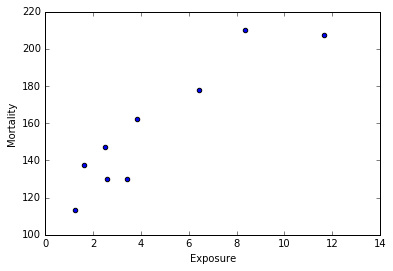

In [7]:
df.plot(kind='scatter',x='Exposure',y='Mortality')

In [13]:
print('Yes.')

Yes.


## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [9]:
lm = smf.ols(formula="Mortality~Exposure",data=df).fit() 
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

In [10]:
intercept, slope = lm.params

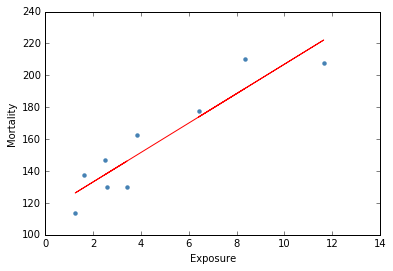

In [11]:
df.plot(kind='scatter',x='Exposure',y='Mortality',color='steelblue',linewidth=0)
plt.plot(df["Exposure"],slope*df["Exposure"]+intercept,"-",color="red")

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

In [12]:
lm.summary()

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     42.34
Date:                Thu, 28 Jul 2016   Prob (F-statistic):           0.000332
Time:                        10:17:14   Log-Likelihood:                -35.397
No. Observations:                   9   AIC:                             74.79
Df Residuals:                       7   BIC:                             75.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    114.7156      8.046     14.258      0.000        95.691   133.741
Exposure       9.2315      1.419      6.507      0.000         5.877    12.586
==============================================================================
Omnibus:                        2.914   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                0.915
Skew:                          -0.030   Prob(JB):                        0.633
Kurtosis:                       1.439   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print("R^2 equals to 0.858.")

R^2 equals to 0.858.


## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [16]:
print("The mortality rate of exposure 10 is", 10*slope+intercept)

The mortality rate of exposure 10 is 207.030193528


In [17]:
def get_mr(exposure):
    rate = exposure*slope + intercept
    return rate

In [18]:
get_mr(10)

207.03019352841989